In [1]:
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt
from scipy import sparse as sp
from time import time
import scipy.sparse.linalg as spla
from math import sqrt
import simulated_data as simd
import data_strm_subclass as dssb
import streaming_subclass as stsb
import plot_functions as pf
import pickle

In [2]:
def expvar(X, W, xnorm2=None):
    if xnorm2 is None:
        xnorm2 = la.norm(X, ord='fro')**2
    return la.norm(X @ W, ord='fro')**2 / xnorm2

# Synthetic Data

In [4]:
n = 10000
B = 10
d = 1000
num_acc = 100

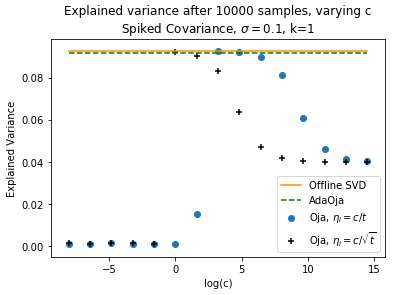

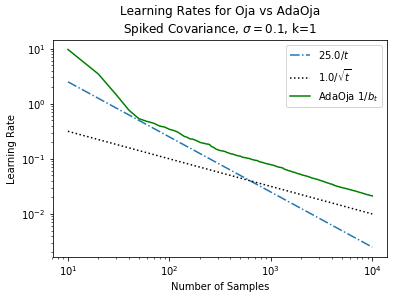

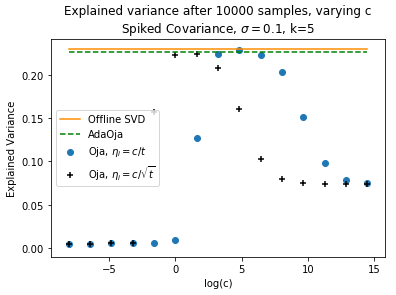

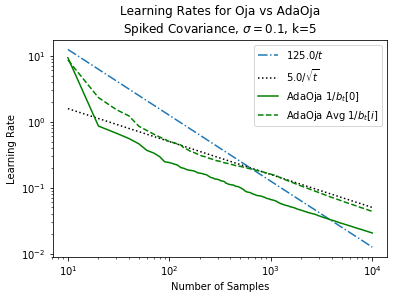

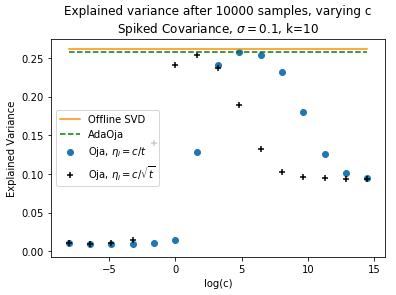

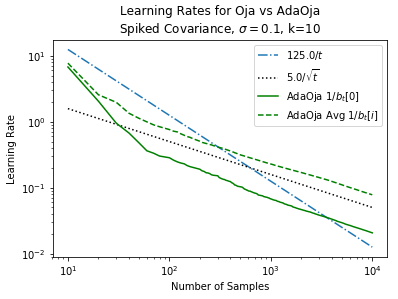

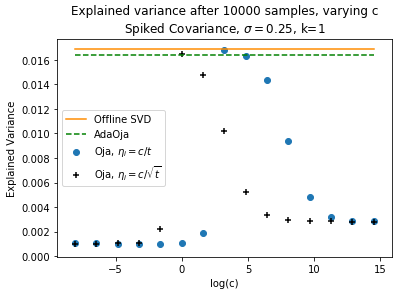

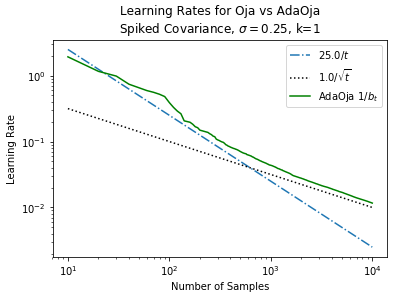

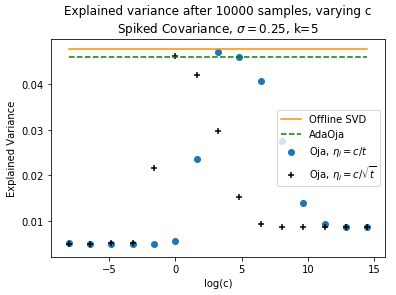

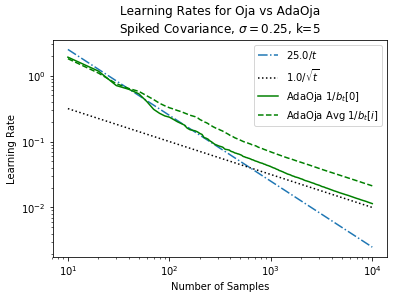

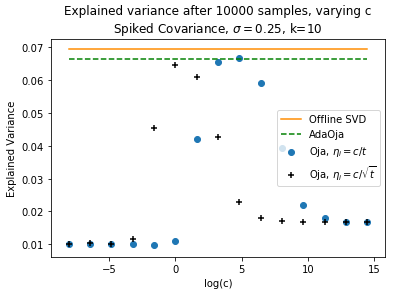

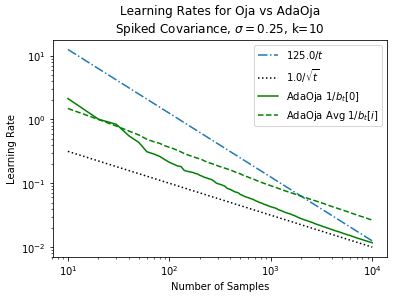

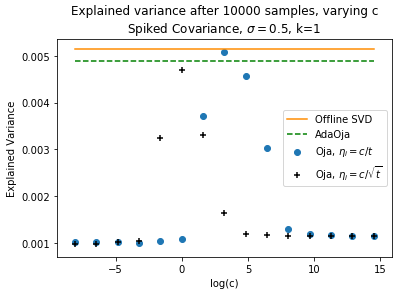

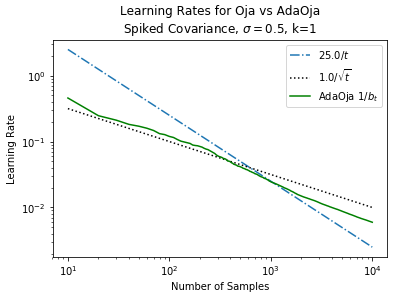

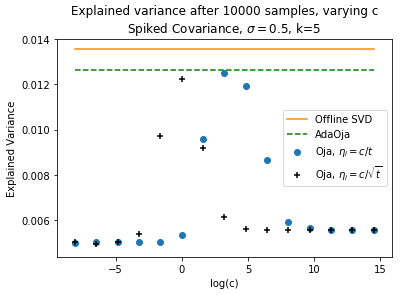

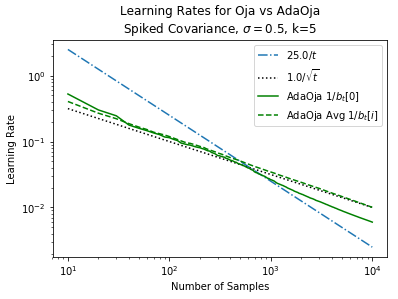

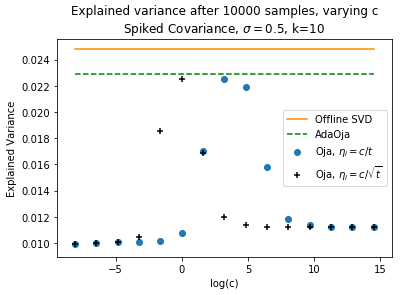

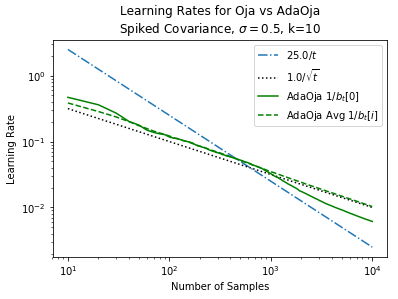

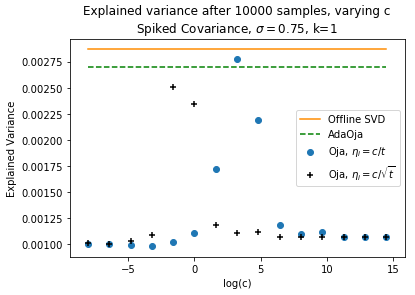

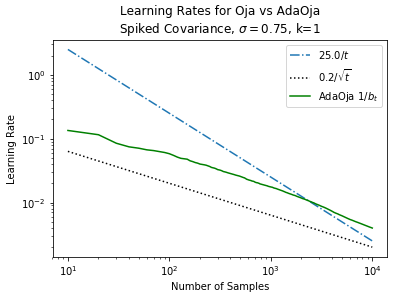

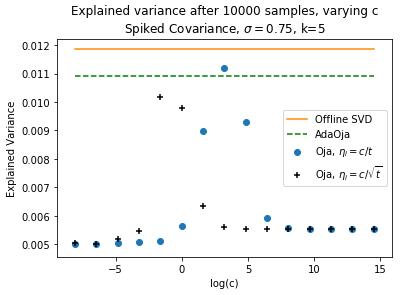

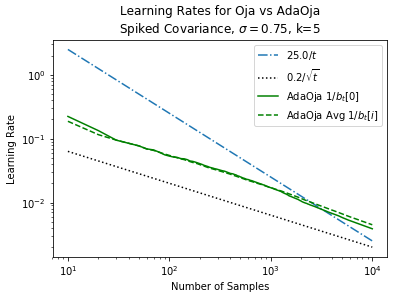

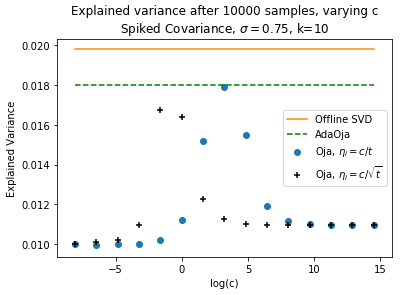

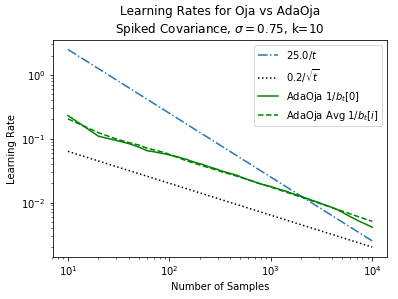

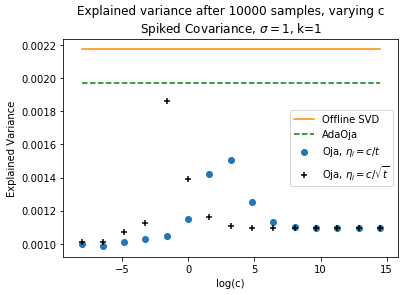

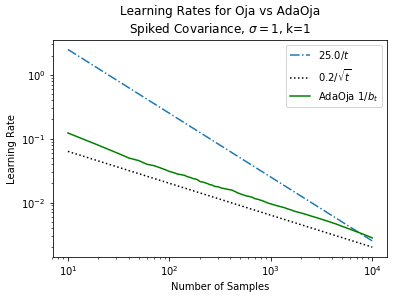

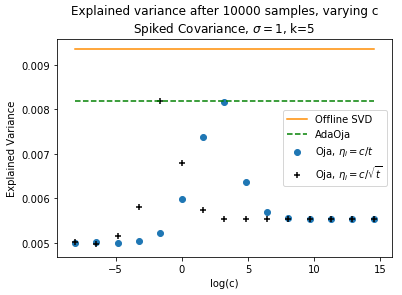

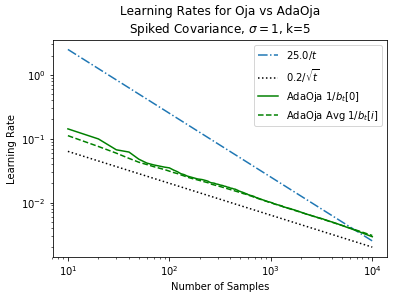

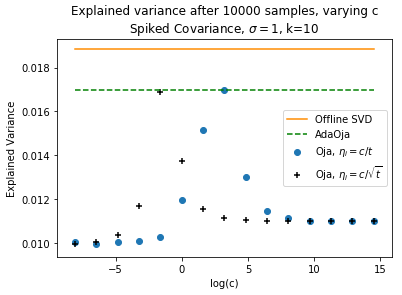

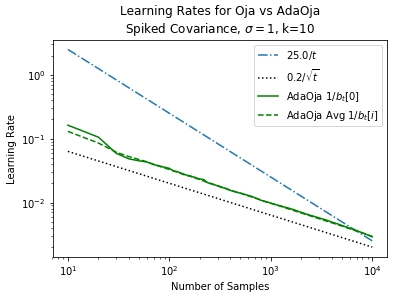

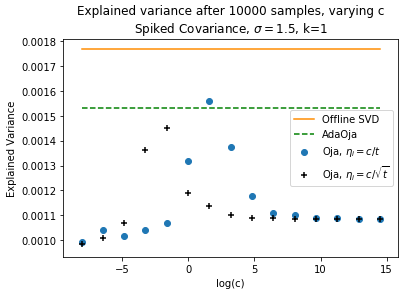

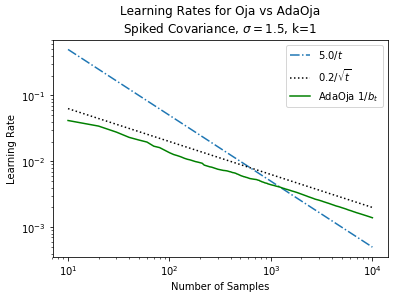

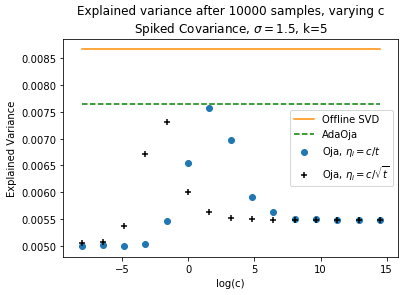

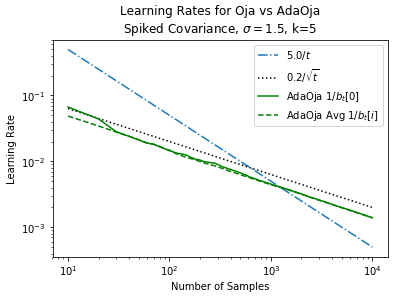

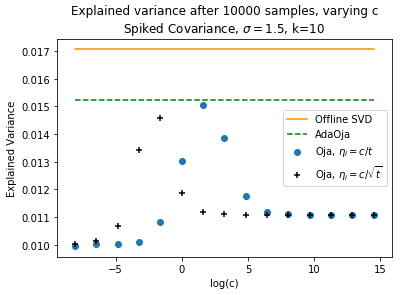

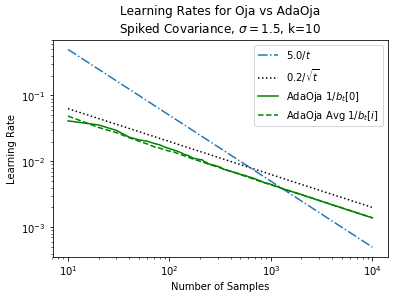

In [5]:
# Initialize learning rate comparison object for spiked covariance model
spcov_lr = pf.compare_lr(base=5., lower=-5., upper=10.)
for sigma in [.1, .25, .5, .75, 1, 1.5]:
    for k in [1, 5, 10]:
        cov, w, A0, X = simd.spiked_covariance(n, d, k, sigma=sigma)
        V = la.eigh(np.cov(X.T))[1][:,::-1][:,:k]
        true_evar = expvar(X, V)
        spcov_lr.run_cval_fullX(X, k, B, Sparse=False)
        dataname = r'Spiked Covariance, $\sigma=$' + str(sigma) + ', k=' + str(k)
        spcov_lr.plot_cval_acc(dataname, 'spcov_sig' + str(sigma).replace(".","") + "_k" + str(k) + "cvals.png", true_evar=true_evar)
        spcov_lr.plot_bvals(dataname, "spcov_sig" + str(sigma).replace(".","") + "_k" + str(k) + "lr.png")
        

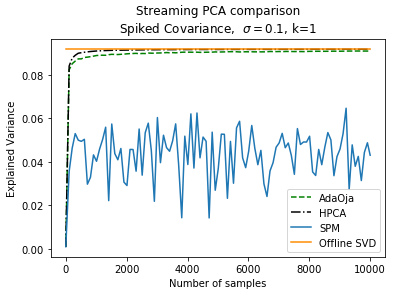

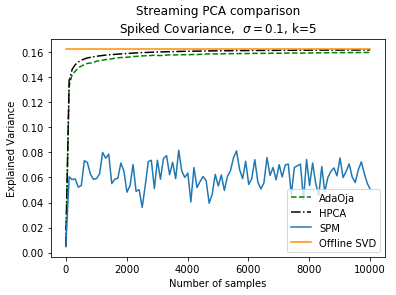

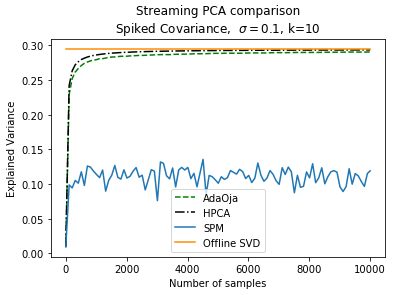

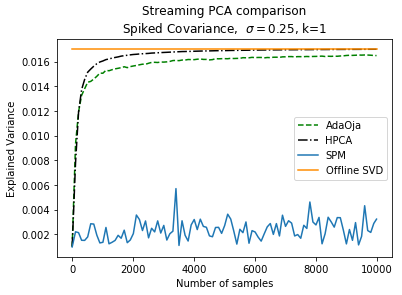

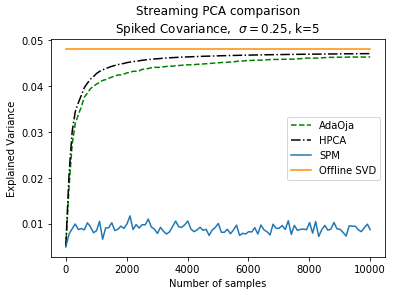

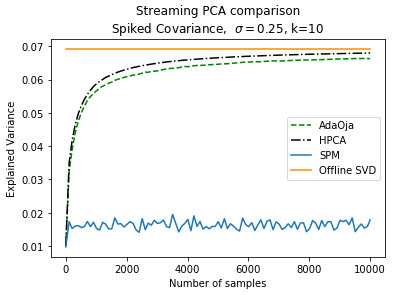

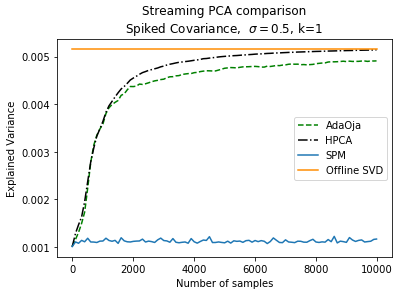

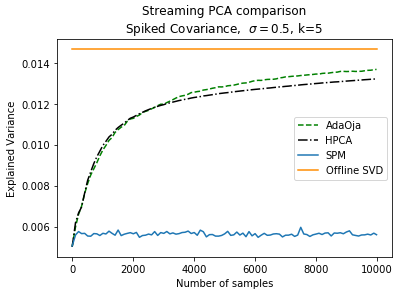

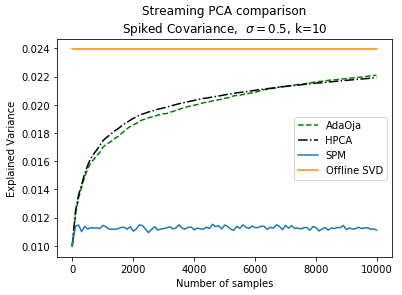

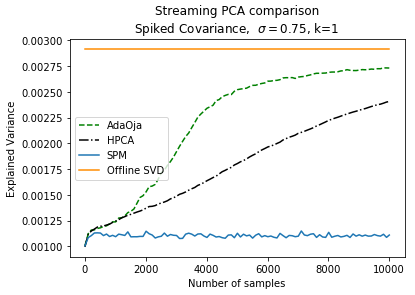

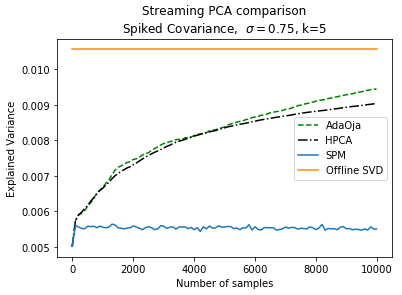

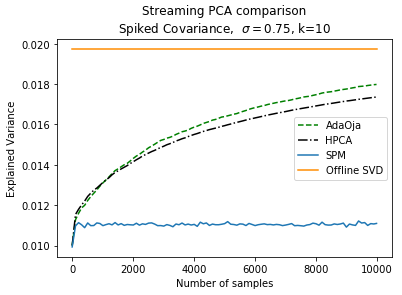

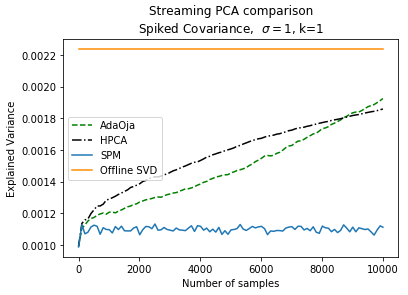

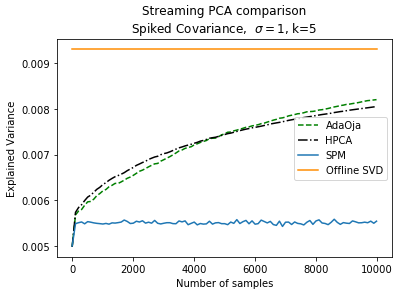

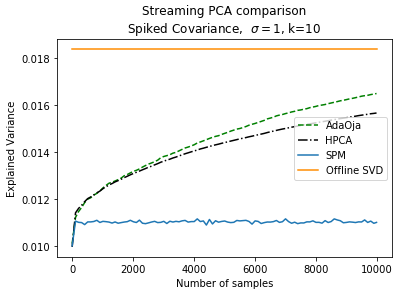

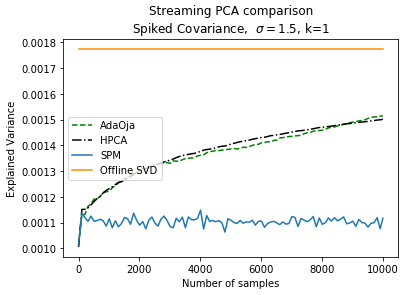

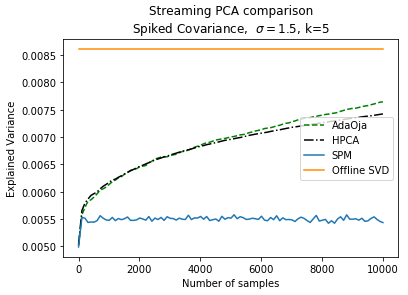

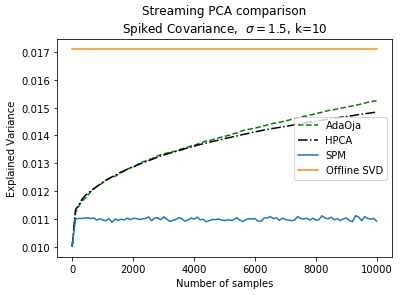

In [6]:
# Initialize learning rate comparison object for spiked covariance model
#B=100
for sigma in [.1, .25, .5, .75, 1, 1.5]:
    for k in [1, 5, 10]:
        cov, w, A0, X = simd.spiked_covariance(n, d, k, sigma=sigma)
        ada_cov, hpca_cov, spm_cov = dssb.run_sim_fullX(X, k, B=B, Sparse=False)
        V = la.eigh(np.cov(X.T))[1][:,::-1][:,:k]
        true_evar = expvar(X, V)
        figname = 'hpcavada_' + 'spcov_k' + str(k) + 's'+ str(sigma).replace(".","") + '.png'
        pf.plot_hpca_ada(ada_cov, hpca_cov, spm_cov, dataname = 'Spiked Covariance, ' + r' $\sigma=$' + str(sigma), figname=figname, true_evar = true_evar)

# Small Bag of Words Data


In [7]:
k = 10
B = 10

In [8]:
# Load Small bag of words data
kos_n, kos_d, kos_nnz, kos_dense, kos_SpX, kos_norm2 = dssb.get_bagX('docword.kos.txt') 
nips_n, nips_d, nips_nnz, nips_dense, nips_SpX, nips_norm2 = dssb.get_bagX('docword.nips.txt')
enr_n, enr_d, enr_nnz, enr_dense, enr_SpX, enr_norm2 = dssb.get_bagX('docword.enron.txt')

In [9]:
# Obtain true ExpVar for Small Bag-of-words data
v_kos = spla.svds((kos_SpX.T.dot(kos_SpX)).astype(float), k=k)[2].T
kos_expvar = la.norm(kos_SpX.dot(v_kos), ord='fro')**2 / kos_norm2

v_nips = spla.svds((nips_SpX.T.dot(nips_SpX)).astype(float), k=k)[2].T
nips_expvar = la.norm(nips_SpX.dot(v_nips), ord='fro')**2 / nips_norm2

v_enr = spla.svds((enr_SpX.T.dot(enr_SpX)).astype(float), k=k)[2].T
enr_expvar = la.norm(enr_SpX.dot(v_enr), ord='fro')**2 / enr_norm2

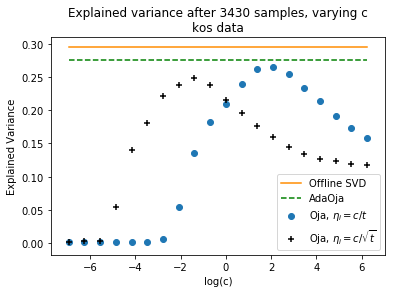

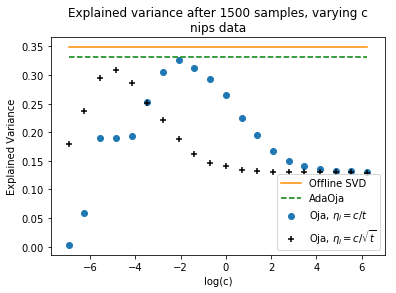

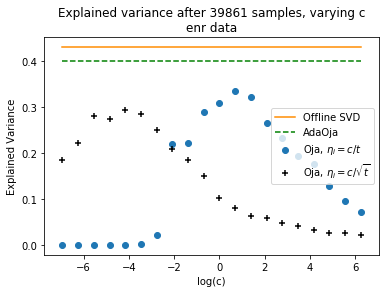

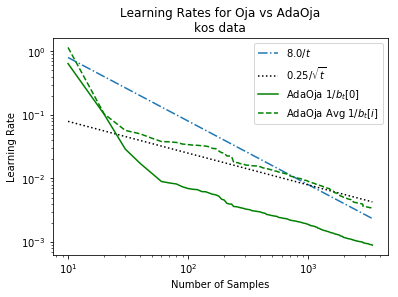

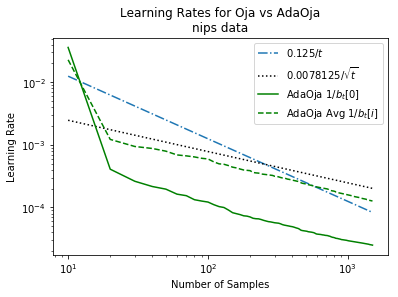

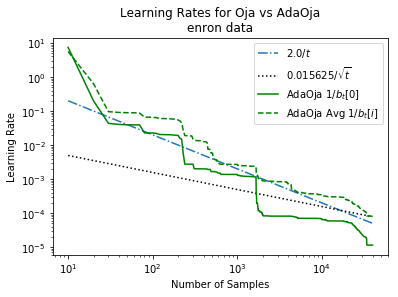

In [10]:
# Create learning rate comparison objects
kos_lr = pf.compare_lr()
nips_lr = pf.compare_lr()
enr_lr = pf.compare_lr()

# Run multiple c values for Oja vs AdaOja
kos_lr.run_cval_bag('docword.kos.txt', k, B=B, X=kos_SpX, xnorm2=kos_norm2)
nips_lr.run_cval_bag('docword.nips.txt', k, B=B, X=nips_SpX, xnorm2=nips_norm2)
enr_lr.run_cval_bag('docword.enron.txt', k, B=B, X=enr_SpX, xnorm2=enr_norm2)

# Plot the cval accuracies for each
kos_lr.plot_cval_acc('kos data', 'kos_cvals.png', true_evar=kos_expvar)
nips_lr.plot_cval_acc('nips data', 'nips_cvals.png', true_evar=nips_expvar)
enr_lr.plot_cval_acc('enr data', 'enr_cvals.png', true_evar=enr_expvar)

# Plot the best case learning rate comparisons for each
kos_lr.plot_bvals('kos data', 'kos_lr.png')
nips_lr.plot_bvals('nips data', 'nips_lr.png')
enr_lr.plot_bvals('enron data', 'enr_lr.png')

In [11]:
# Plot HPCA convergence vs. AdaOja Convergence
adaoja_kos, hpca_kos, spm_kos = dssb.run_sim_bag('docword.kos.txt', k, B=B, X=kos_SpX, xnorm2=kos_norm2)
adaoja_nips, hpca_nips, spm_nips = dssb.run_sim_bag('docword.nips.txt', k, B=B, X=nips_SpX, xnorm2=nips_norm2)
adaoja_enr, hpca_enr, spm_enr = dssb.run_sim_bag('docword.enron.txt', k, B=B, X=enr_SpX, xnorm2=enr_norm2)

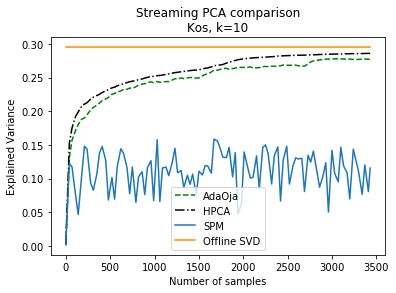

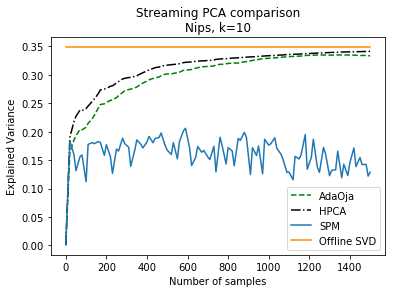

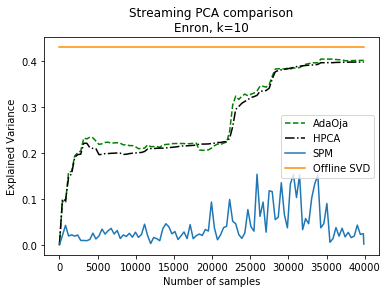

In [12]:
pf.plot_hpca_ada(adaoja_kos, hpca_kos, spm_kos, 'Kos', true_evar=kos_expvar)
pf.plot_hpca_ada(adaoja_nips, hpca_nips, spm_nips, 'Nips', true_evar=nips_expvar)
pf.plot_hpca_ada(adaoja_enr, hpca_enr, spm_enr, 'Enron', true_evar=enr_expvar)

# Large Bag of Words Data

In [13]:
B = 100
k = 10
nyt_n, nyt_d, nyt_nnz, nyt_dense, nyt_SpX, nyt_norm2 = dssb.get_bagXblocks('docword.nytimes.txt', B)
pm_n, pm_d, pm_nnz, pm_dense, pm_SpX, pm_norm2 = dssb.get_bagXblocks('docword.pubmed.txt', B=1000, block_total=300)

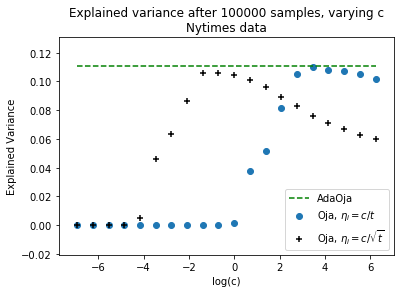

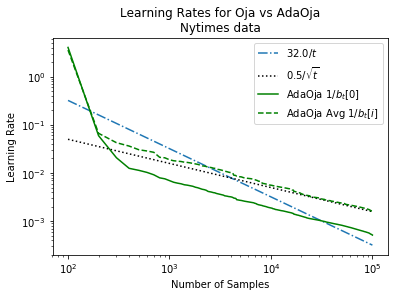

In [14]:
nyt_lr = pf.compare_lr()
nyt_lr.run_cval_blocklist(nyt_SpX, k, xnorm2=nyt_norm2)
nyt_lr.plot_cval_acc('Nytimes data', 'nyt_cvals.png')
nyt_lr.plot_bvals('Nytimes data', 'nyt_lr.png')

In [15]:
adaoja_nyt, hpca_nyt, spm_nyt = dssb.run_sim_blocklist(nyt_SpX, k, xnorm2=nyt_norm2)

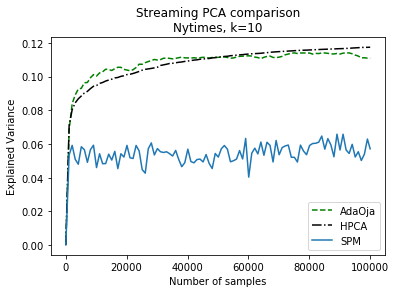

In [16]:
pf.plot_hpca_ada(adaoja_nyt, hpca_nyt, spm_nyt, 'Nytimes')

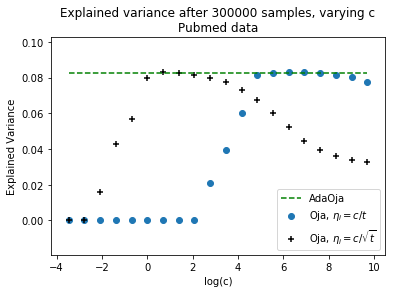

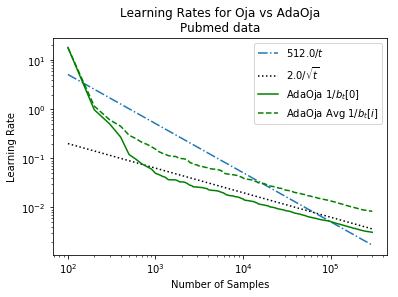

In [16]:
pm_lr = pf.compare_lr(base=2., lower=-5, upper=15)
pm_lr.run_cval_blocklist(pm_SpX, k, xnorm2=pm_norm2)
pm_lr.plot_cval_acc('Pubmed data', 'pm_cvals.png')
pm_lr.plot_bvals('Pubmed data', 'pm_lr.png')

In [3]:
adaoja_pm, hpca_pm, spm_pm = dssb.run_sim_blocklist(pm_SpX, k, xnorm2=pm_norm2)

KeyboardInterrupt: 

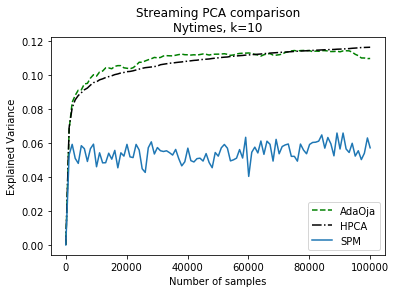

In [4]:
pf.plot_hpca_ada(adaoja_pm, hpca_pm, spm_pm'Pubmed')

# CIFAR

In [17]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [18]:
# Load the CIFAR data
db = []
for i in range(1, 6):
    db.append(unpickle('data_batch_' + str(i))[b'data'])
CIFAR = np.vstack(db)
CIFAR_sc = CIFAR - CIFAR.mean(axis=0)
CIFAR_norm2 = la.norm(CIFAR_sc, ord='fro')**2
v_CIFAR = la.eigh(np.cov(CIFAR.T))[1][:,::-1]

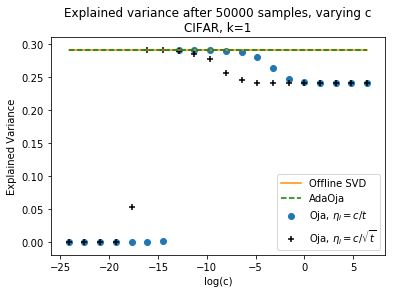

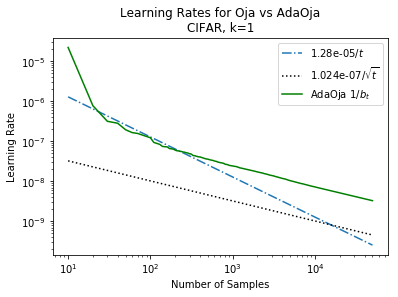

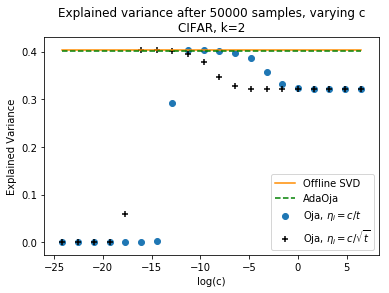

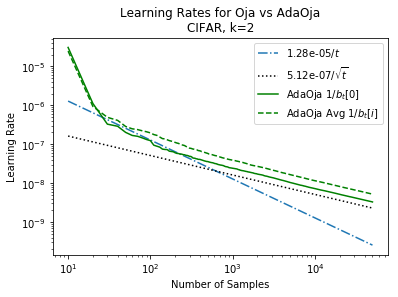

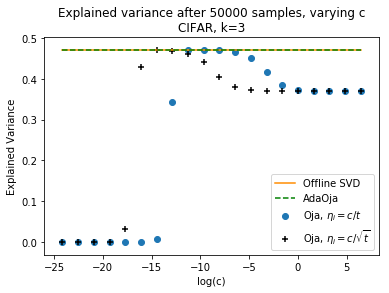

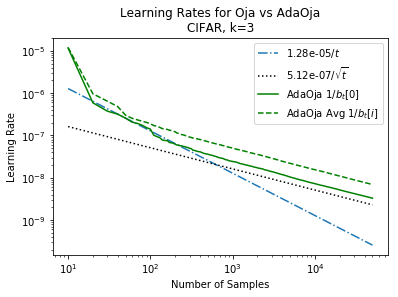

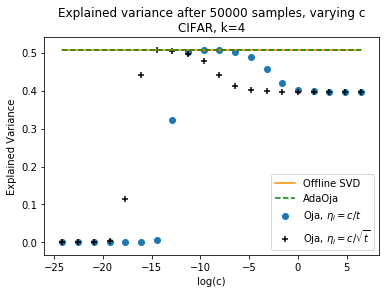

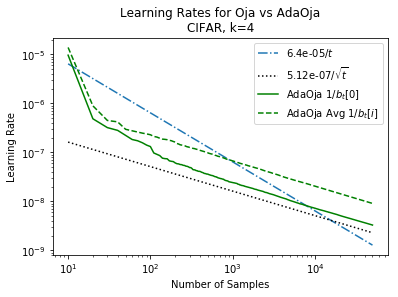

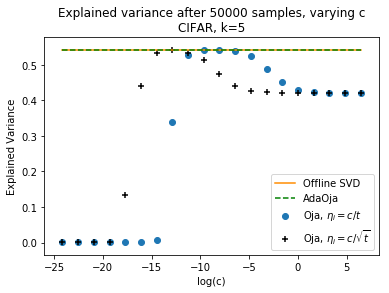

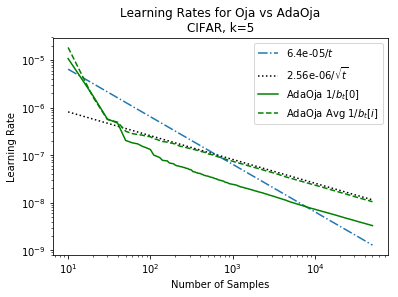

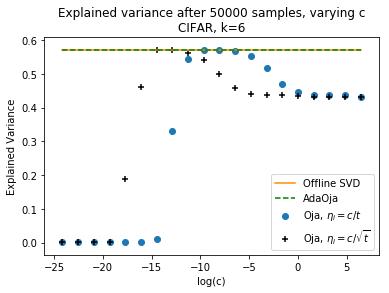

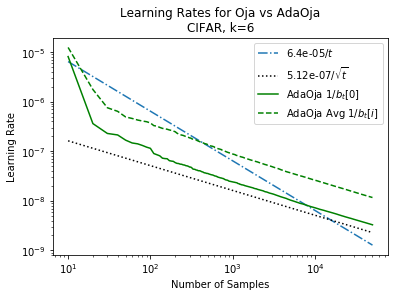

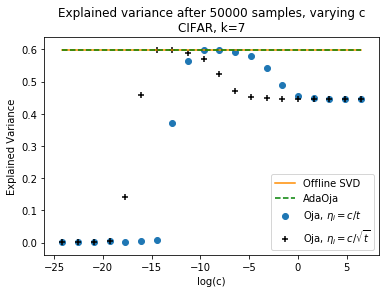

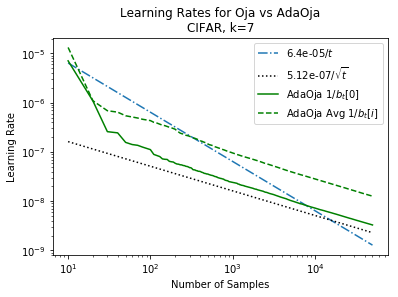

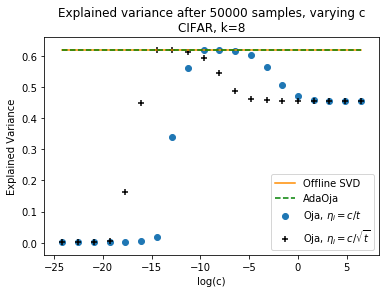

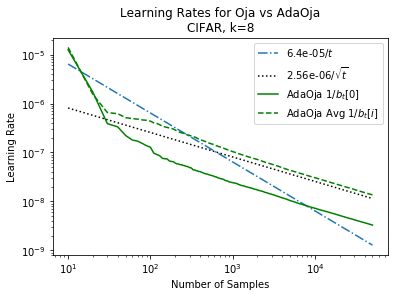

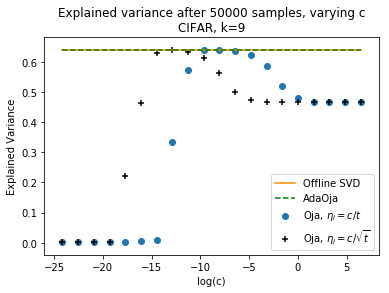

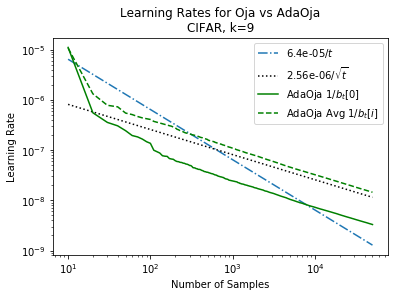

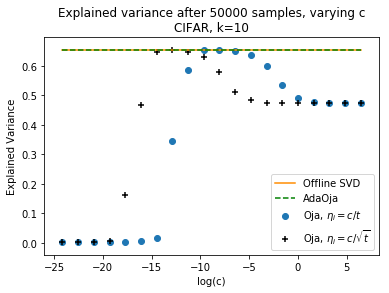

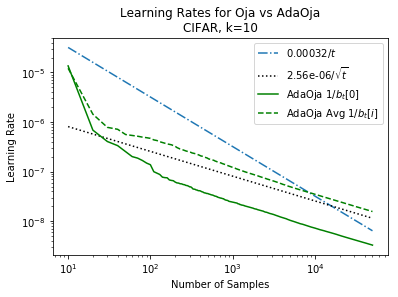

In [19]:
B = 10
CIFAR_lr = pf.compare_lr(base=5., lower=-15, upper=5)
for k in range(1,11):
    CIFAR_lr.run_cval_fullX(CIFAR_sc, k, B, Sparse=False, xnorm2=CIFAR_norm2)
    CIFAR_evar = expvar(CIFAR_sc, v_CIFAR[:,:k], xnorm2=CIFAR_norm2)
    CIFAR_lr.plot_cval_acc('CIFAR, k=' + str(k), 'CIFAR_cvals_k' + str(k) + '.png', true_evar = CIFAR_evar)
    CIFAR_lr.plot_bvals('CIFAR, k=' + str(k), 'CIFAR_lr_k' + str(k) + '.png')  
    

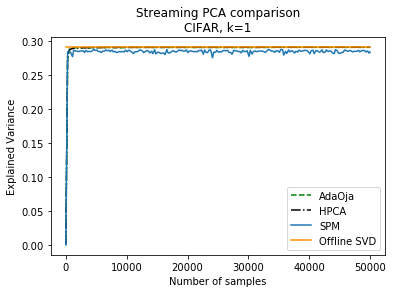

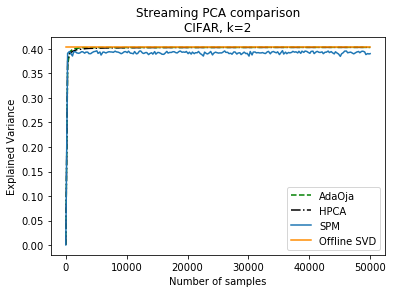

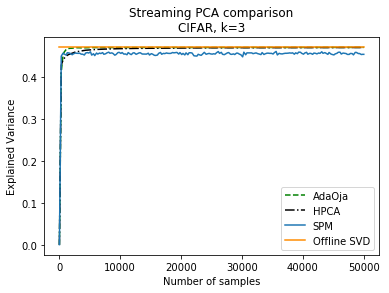

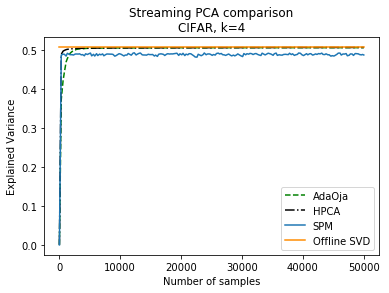

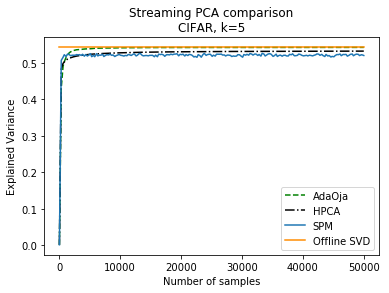

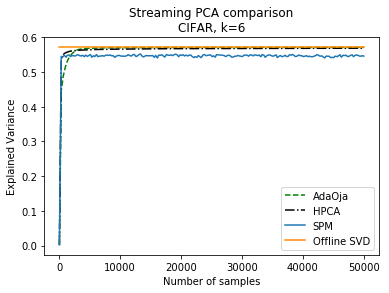

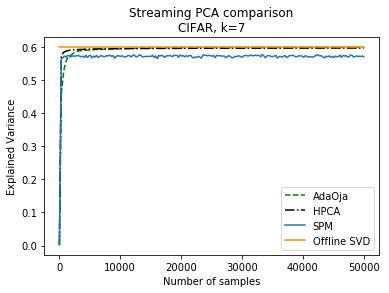

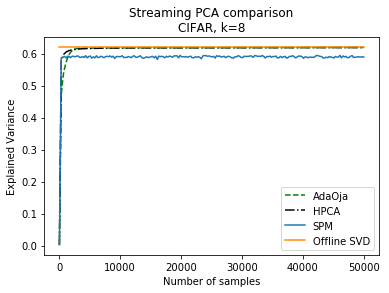

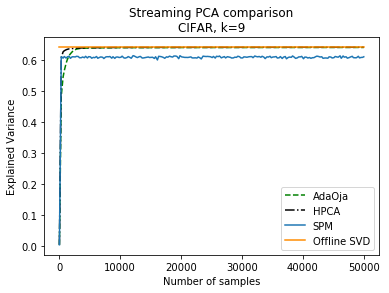

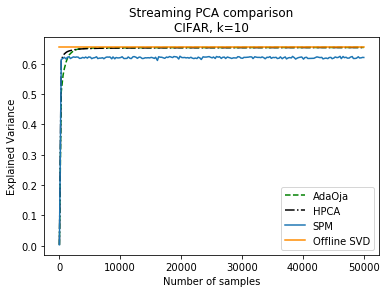

In [20]:
B = 100
for k in range(1, 11):
    ada_CIFAR, hpca_CIFAR, spm_CIFAR = dssb.run_sim_fullX(CIFAR_sc, k, B=B, Sparse=False, xnorm2 = CIFAR_norm2, num_acc=200)
    CIFAR_evar = expvar(CIFAR_sc, v_CIFAR[:,:k], xnorm2=CIFAR_norm2)
    pf.plot_hpca_ada(ada_CIFAR, hpca_CIFAR, spm_CIFAR, 'CIFAR', true_evar=CIFAR_evar)